,addiction_status,depression_score
0,nonaddict,45.024452
1,nonaddict,56.711489
2,nonaddict,50.570790
3,nonaddict,51.995887
4,nonaddict,62.585654


Number of addicts in the population = 7327
Number of nonaddicts in the population =  8905
True Standardized Mean Difference: 0.9788291101849471



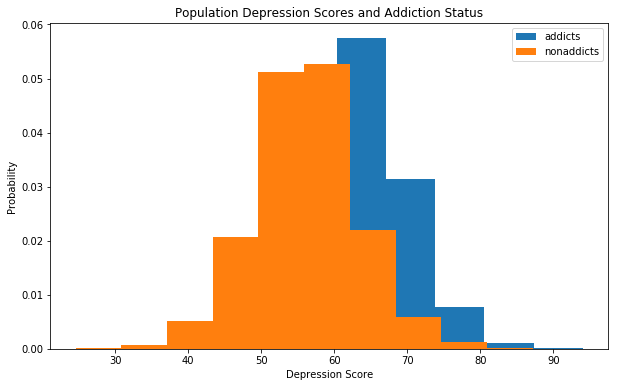

Study Summary Statistics:


,n_addicts,addict_mean,addict_sd,n_nonaddicts,nonaddict_mean,nonaddict_sd,smd,se_smd,lb,ub,weight
study ID,,,,,,,,,,,
0,58,62.807947,6.382566,83,57.155535,6.917677,0.838656,0.192724,0.460917,1.216396,26.923237
1,43,62.684092,7.301317,52,54.210795,7.437457,1.139432,0.230891,0.686886,1.591979,18.757942
2,81,64.008445,6.920467,116,55.774793,6.379271,1.241465,0.171051,0.906205,1.576725,34.178165
3,86,63.832093,7.025699,111,55.393340,7.690723,1.134725,0.163768,0.813739,1.455711,37.285516
4,22,62.553260,5.483627,48,57.152343,7.620805,0.759711,0.308976,0.154118,1.365303,10.474920
5,87,63.315708,6.014855,91,56.140695,7.952092,1.010223,0.160391,0.695856,1.324589,38.872187
6,61,61.956946,8.596026,57,54.114870,7.349228,0.971677,0.190349,0.598593,1.344762,27.599246
7,28,61.195763,6.358319,37,54.959140,6.743643,0.936306,0.278494,0.390459,1.482154,12.893456
8,90,62.648564,6.176148,102,56.797499,6.732159,0.899699,0.155870,0.594194,1.205204,41.160066


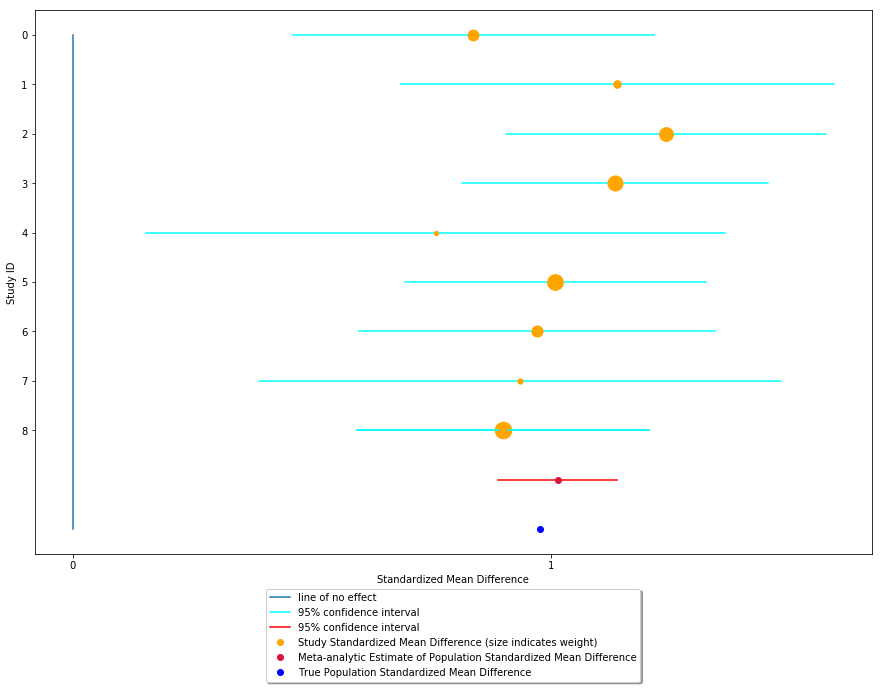

Z statistic of summary effect estimate =  15.987285294432617
p <  0.001


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# generating a population of individuals, each with an addiction status and depression score

pop_size = np.random.randint(8000,20000)

addiction = np.array([])

prev_addicted = np.random.uniform(low = 0.3, high = 0.6)

for i in np.arange(pop_size):
    addiction = np.append(addiction, np.random.choice(['addict','nonaddict'], p =[prev_addicted,1-prev_addicted]))
    
depression_scores = np.array([]) 

addict_depress_mean = np.random.randint(60,70)
nonaddict_depress_mean = np.random.randint(50,60)

for i in addiction: 
    if i == 'addict':
        depression_scores = np.append(depression_scores, np.random.normal(addict_depress_mean,np.random.randint(5,10)))
    if i == 'nonaddict':
        depression_scores = np.append(depression_scores, abs(np.random.normal(nonaddict_depress_mean,np.random.randint(5,10))))
    
df = pd.DataFrame()    
df['addiction_status'] = addiction
df['depression_score'] = depression_scores


display(df.head())

# calculating the population effect size
addicts = df[df['addiction_status'] == 'addict']
nonaddicts = df[df['addiction_status'] == 'nonaddict']

print('Number of addicts in the population =', len(addicts))
print('Number of nonaddicts in the population = ', len(nonaddicts))

n_addicts = len(addicts['depression_score'])
addicts_mean = np.mean(addicts['depression_score'])
addicts_sd = np.std(addicts['depression_score'], ddof = 1)
n_nonaddicts = len(nonaddicts['depression_score'])
nonaddicts_mean = np.mean(nonaddicts['depression_score'])
nonaddicts_sd = np.std(nonaddicts['depression_score'], ddof = 1)
pooled_sd = np.sqrt(((n_addicts-1)*addicts_sd**2 + (n_nonaddicts-1)*nonaddicts_sd**2) / (n_addicts+n_nonaddicts-2))
true_smd = (addicts_mean-nonaddicts_mean)/pooled_sd

print('True Standardized Mean Difference:', true_smd)
print()

plt.figure(figsize = (10,6))
plt.hist(addicts.iloc[:,1], density = True, label = 'addicts', )
plt.hist(nonaddicts.iloc[:,1], density = True, label = 'nonaddicts')
plt.xlabel('Depression Score')
plt.ylabel('Probability')
plt.title('Population Depression Scores and Addiction Status')
plt.legend()
plt.show()


# simulating the studies

no_of_studies = np.random.randint(5,40)


studies = []
study_dfs = []
for i in np.arange(no_of_studies):
    sample_size = np.random.randint(20,200)
    unit_loc = np.random.choice(list(np.arange(0,len(df)-1)), size = sample_size)
    sample = []
    for el in unit_loc:
        sample.append(df.iloc[el,:])
    df_study = pd.DataFrame(sample)
    study_dfs.append(df_study)
    
    
# calculating the study summary statistics

summary_stats = []

def var_d_func(n1,n2,smd):
    temp = (n1+n2)/(n1*n2) + smd**2/(2*(n1+n2))
    
    return temp
    
def j_func(df):
    
    temp = 1 - 3/(4*df-1)
    
    return temp

for i in np.arange(len(study_dfs)): 
   
    temp_df = study_dfs[i]
    temp_addicts = temp_df[temp_df['addiction_status'] == 'addict']
    n_addicts = len(temp_addicts)
    addict_temp_depression_score = temp_addicts['depression_score']
    addict_mean = np.mean(addict_temp_depression_score)
    addict_sd = np.std(addict_temp_depression_score,ddof = 1)
    temp_nonaddicts = temp_df[temp_df['addiction_status'] == 'nonaddict']
    n_nonaddicts = len(temp_nonaddicts)
    nonaddict_temp_depression_score = temp_nonaddicts['depression_score']
    nonaddict_mean = np.mean(nonaddict_temp_depression_score)
    nonaddict_sd = np.std(nonaddict_temp_depression_score,ddof = 1)
    pooled_sd = np.sqrt((((n_addicts-1)*addict_sd**2)+ ((n_nonaddicts-1)*nonaddict_sd**2))/(n_addicts+n_nonaddicts-2))
    d = (addict_mean-nonaddict_mean)/pooled_sd
    vard = var_d_func(n_addicts,n_addicts,d)
    j_correct = j_func((n_addicts+n_nonaddicts-2))
    smd = d*j_correct
    var_smd = j_correct**2 * vard
    se_smd = np.sqrt(var_smd)
    ub = smd + 1.96 * se_smd
    lb = smd - 1.96 * se_smd
    weight = 1/var_smd
    
    summary_stats.append([n_addicts,addict_mean, addict_sd,n_nonaddicts, nonaddict_mean,nonaddict_sd,
                          smd,se_smd, lb,ub, weight])


summary = pd.DataFrame(summary_stats, columns = ['n_addicts','addict_mean','addict_sd',
                             'n_nonaddicts','nonaddict_mean', 'nonaddict_sd','smd', 'se_smd', 'lb', 'ub','weight'])

summary.index.name = 'study ID'

summary.fillna(0, inplace=True)

print('Study Summary Statistics:')
display(summary)


# calculating the fixed effect meta-analysis statistics

effect_sizes = summary['smd']
weights = summary['weight']
sum_of_weights = np.sum(weights)

effect_size_times_weight = effect_sizes * weights


sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean


# standardizing the weights for the purpose of graphical display

stndrd_weights = summary['weight']/np.sum(summary['weight']) * 100


# creating a forest plot

y = []
zeros = []
for i in np.arange(len(summary.index)+2):
    y.append(i)
    zeros.append(0)
    
study_list = list(summary.index)
x_ticks = np.arange(0,max(summary['smd']+1))

plt.figure(figsize = (15,10))
plt.plot(zeros,y, label = 'line of no effect')
plt.yticks(study_list)
plt.gca().invert_yaxis()
plt.xticks(x_ticks)
plt.xlabel('Standardized Mean Difference')
plt.ylabel('Study ID')


for i in np.arange(len(summary)):
    xs = np.linspace(summary['lb'].iloc[i],summary['ub'].iloc[i])
    ys = []
    for x in xs:
        ys.append(study_list[i])
    plt.plot(xs, ys, color = 'cyan')
    plt.plot(summary['smd'].iloc[i], i, 'o', color = 'orange', markersize = stndrd_weights[i])

    
ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    

plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(summary['smd'][len(summary['smd'])-1], len(summary['smd'])-1, 'o',
         color = 'orange', label = 'Study Standardized Mean Difference (size indicates weight)')   
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Standardized Mean Difference')
plt.plot(true_smd,max(study_list)+2, 'o', color = 'blue', label = 'True Population Standardized Mean Difference')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()


# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)
